## Case Study: Diamond price prediction

The following notebook performs EDA on the data about diamonds in an attempt to understand the organization of the data as well as the qualitative relations between the anatomical parameters of a diamond and its price.

Importing requred libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

Reading the dataset from a csv file to a pandas dataframe:

In [2]:
df = pd.read_csv('diamonds.csv')

Reading the basic information of the dataframe:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Displaying the dataframe:

In [4]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


The dataframe looks quite organized and neat for the most part. There is, however, one unnecessary column, the one named 'Unnamed: 0'. This column can be deleted.

In [5]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

The basic descriptive statistics of the dataframe can now be checked.

In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

As can be seen, the count of all the parameters is the same as the total length of the dataframe. This shows that there are no null values in any of the columns. The same may be verified by using the isnull().sum() function as well.

The standard deviation of the price is high. In fact, it is greater than the mean of the price. This indicates a high variance in the price.

The price, y, and z also have a maximum value much higher than their respective medians. This indicates the presence of skewedness.

<AxesSubplot:>

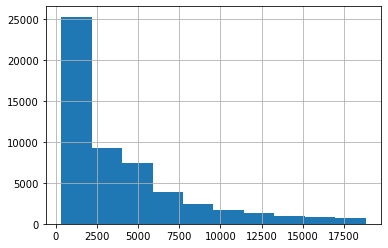

In [8]:
df['price'].hist()

### Checking for outliers:

In [9]:
dims = ['x', 'y', 'z']

Using a boxplot to visualize the concentration of data:

<AxesSubplot:>

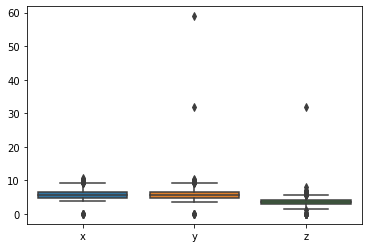

In [10]:
sns.boxplot(data = df[dims])

Defining interquartile ranges for each of the three parameters (x, y and z) and using that to filter outliers:

In [11]:
# for dim in dims:

#     q1 = df[dim].quantile(0.25)                 
#     q3 = df[dim].quantile(0.75)
#     iqr = q3 - q1

#     # Apply filter with respect to IQR, including optional whiskers
#     filter = (df[dim] >= q1 - iqr*1.5) & (df[dim] <= q3 + 1.5*iqr)
#     kd = df.loc[filter]

# kd.reset_index(inplace = True)

In [12]:
vol = []

for i in range(len(df)):
    vol.append((df.at[i, 'x'])*(df.at[i, 'y'])*(df.at[i, 'z']))

# vol

df.loc[:,'xyz'] = vol

In [13]:
for i in range(len(df)):
    if df.loc[i, 'xyz'] == 0:
        df.drop([i], inplace = True)

df.reset_index(inplace = True)

kd = df

In [14]:
kd

,index,carat,cut,color,clarity,depth,table,price,x,y,z,xyz
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...,...
53915,53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,115.920000
53916,53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,118.110175
53917,53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,114.449728
53918,53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,140.766120


The filtered dataframe is named kd. Further analysis will be conducted on this dataframe.

### Univariate, bivariate and multivariate analysis

Analyzing a categorical parameter:

In [15]:
param = input('Enter a categorical parameter:  ')

Enter a categorical parameter:  cut


In [16]:
kd[param].value_counts()

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

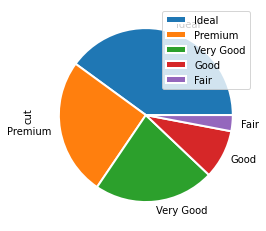

In [17]:
kd[param].value_counts().plot.pie(wedgeprops = {'linewidth': 2, 'edgecolor': 'white'}, legend = True)
plt.show()

In [18]:
kd[param].describe()

count     53920
unique        5
top       Ideal
freq      21548
Name: cut, dtype: object

Understanding how one parameter relates to another:

In [19]:
x, y = input('Enter parameter 1:  '), input('Enter parameter 2:  ')

Enter parameter 1:  cut
Enter parameter 2:  color


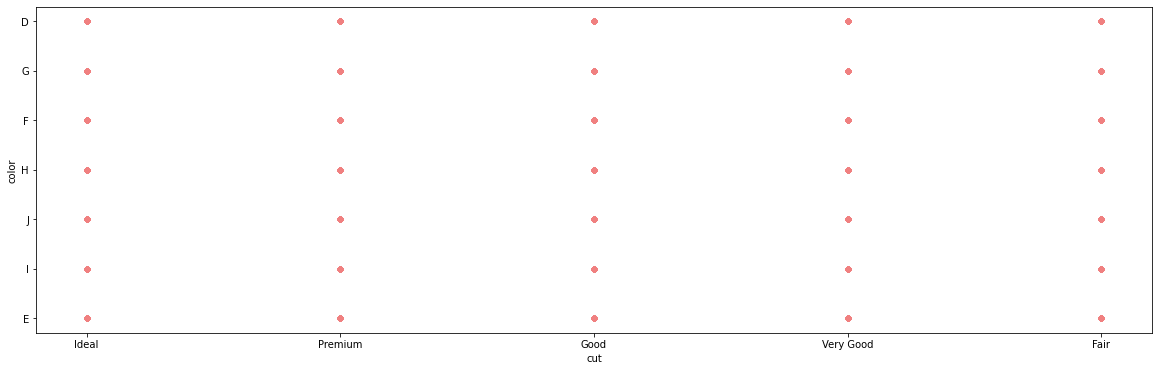

In [20]:
plt.rcParams['figure.figsize'] = (20, 6)

kd.plot.scatter(x, y, color = 'lightcoral')
plt.show()

Correlation plots:

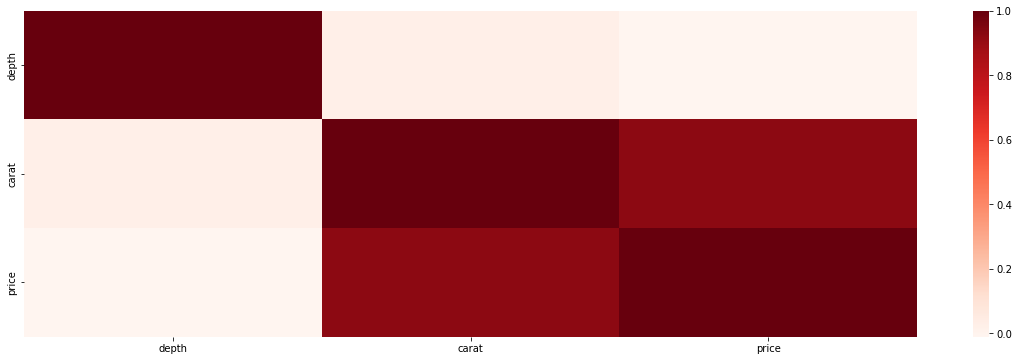

In [21]:
# kd[['depth', 'table', 'carat']].corr()

sns.heatmap(kd[['depth', 'carat', 'price']].corr(), annot = False, cmap = 'Reds')
plt.show()

Categorical-Numerical data analysis:

In [22]:
kd.groupby('cut')['price'].median()

cut
Fair         3282.0
Good         3050.5
Ideal        1809.5
Premium      3182.0
Very Good    2647.0
Name: price, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


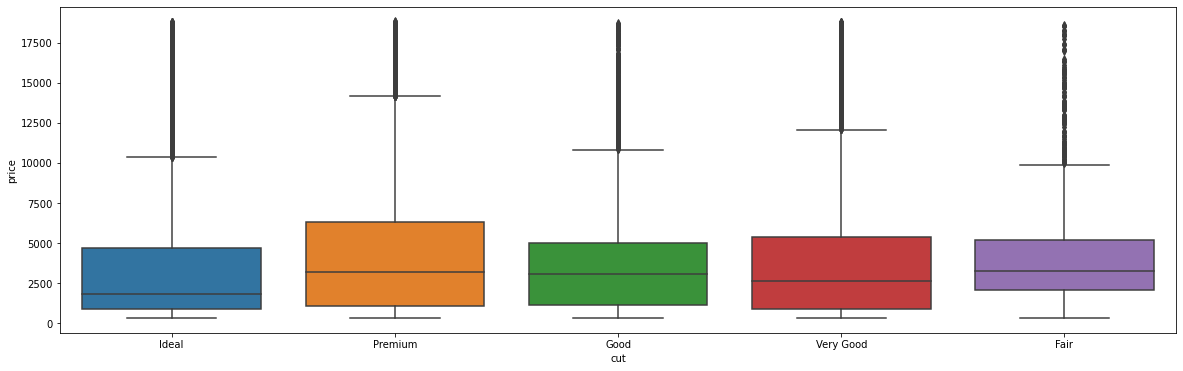

In [23]:
sns.boxplot(kd['cut'], kd['price'])
plt.show()

Pairplots:

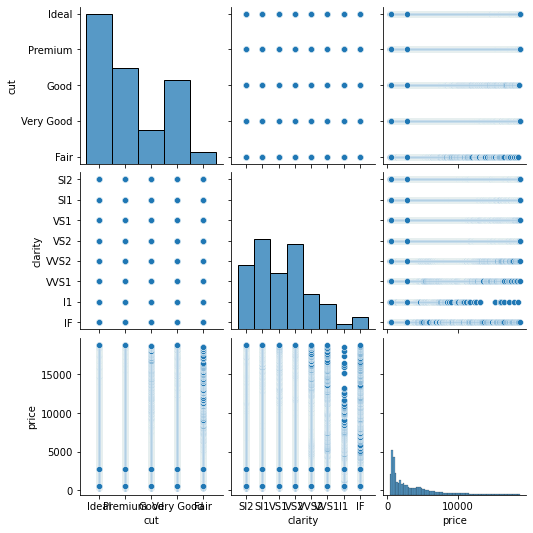

In [24]:
sns.pairplot(data = kd, vars = ['cut', 'clarity', 'price'])
plt.show()

Understanding how three parameters relate to one another:

In [25]:
i, c, v = input('Enter parameter 1:  '), input('Enter parameter 2:  '), 'price'

Enter parameter 1:  cut
Enter parameter 2:  color


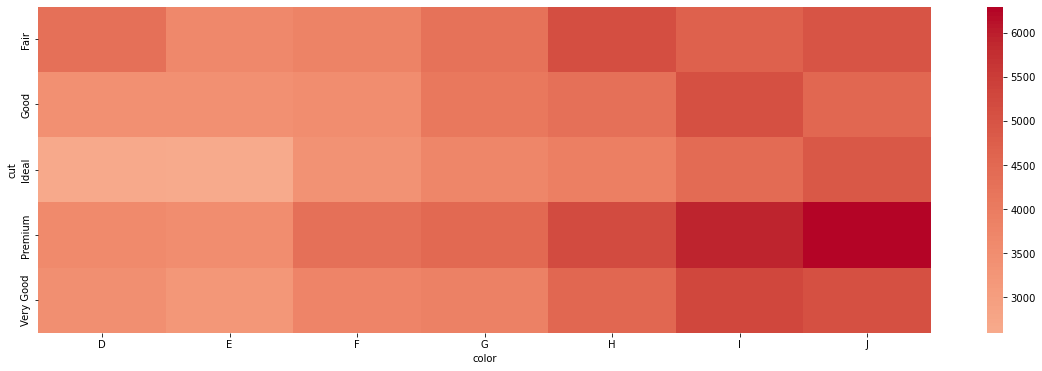

In [26]:
result = pd.pivot_table(data = kd, index = i, columns = c, values = v)

sns.heatmap(result, annot = False, cmap = 'coolwarm', center = 0.117)
plt.show()

### Observations:

Diamonds with a premium cut are expensive is amazing and so are those in colour J. Even though class SI2 is not the best when it comes to clarity, diamonds of SI2 clarity are also expensive. This suggests a possible correlation between clarity and another parameter upon which the price might be dependent. However, conclusive remarks cannot be made about the same at this point.

Greater the values of x, y and z, higher the price.

A heatmap of (carat, clarity, price) is a good indicator of the patterns and correlations.

Fair cut diamonds are expensive around the carat values 2 and 2.5.

### Regression

In [27]:
import warnings
warnings.filterwarnings('ignore')

# Modelling Algorithms:

# Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Modelling Helpers:
from sklearn.preprocessing import Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

#preprocessing :
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

#evaluation metrics:

# Regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error 

# Visualisation
import matplotlib as mpl
import matplotlib.pylab as pylab

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

Feature encoding is performed on important categorical variables in order to prepare a better numerical model for the regression.

In [28]:
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()


df['cut'] = label_cut.fit_transform(df['cut'])
df['color'] = label_color.fit_transform(df['color'])
df['clarity'] = label_clarity.fit_transform(df['clarity'])

Train-test split:

In [29]:
X = df.drop(['price'], axis = 1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 66)

Feature scaling:

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Scores and models:

In [31]:
R2_Scores = []
models = ['Linear Regression' , 'Lasso Regression' , 'AdaBoost Regression' , 'Ridge Regression' , 'GradientBoosting Regression']

Linear regression:

In [32]:
clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)

accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5, verbose = 1)

y_pred = clf_lr.predict(X_test)

print('')
print('Linear Regression')
print('Score : %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

print("Linear Regression Coefficients: \n")
print(clf_lr.coef_)

R2_Scores.append(r2)

import statsmodels.api as sm

x_train = X_train
y_train_2 = y_train
x_train_1 = sm.add_constant(x_train)
model = sm.OLS(y_train_2, x_train_1)
results = model.fit()
print(results.summary())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished



Linear Regression
Score : 0.8878
[0.81185655 0.8896162  0.88415445 0.87934992 0.89068855]

MSE    : 1808254.96 
MAE    : 860.26 
RMSE   : 1344.71 
R2     : 0.89 
Linear Regression Coefficients: 

[ 6.85731935e-03  1.04067330e+04  7.33316886e+01 -2.67666039e+02
  2.87964454e+02 -1.37730713e+02 -9.03758855e+01 -8.72701250e+02
 -1.96207573e+02 -1.58598741e+02  4.36925780e+00]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 3.037e+04
Date:                Wed, 05 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:18:32   Log-Likelihood:            -3.7199e+05
No. Observations:               43136   AIC:                         7.440e+05
Df Residuals:                   43124   BIC:                         7

Lasso regression:

In [33]:
clf_la = Lasso(normalize=True)
clf_la.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_la, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_la.predict(X_test)
print('')
print('###### Lasso Regression ######')
print('Score : %.4f' % clf_la.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print("Lasso Regression Coefficients: \n")
print(clf_la.coef_)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)


###### Lasso Regression ######
Score : 0.8659
[0.84325794 0.86900908 0.86386377 0.86539939 0.86976975]
Lasso Regression Coefficients: 

[ 0.00000000e+00  7.33393042e+03  0.00000000e+00 -7.98470444e+01
  1.55389438e+02 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.07782927e+00]

MSE    : 2162331.83 
MAE    : 909.60 
RMSE   : 1470.49 
R2     : 0.87 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Adaptive boosting:

In [34]:
clf_ar = AdaBoostRegressor(n_estimators=1000)
clf_ar.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_ar, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_ar.predict(X_test)
print('')
print('###### AdaBoost Regression ######')
print('Score : %.4f' % clf_ar.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)


print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished



###### AdaBoost Regression ######
Score : 0.9843
[0.9849192  0.98956434 0.98491296 0.97988582 0.98480692]

MSE    : 252859.70 
MAE    : 363.45 
RMSE   : 502.85 
R2     : 0.98 


Ridge regression:

In [35]:
clf_rr = Ridge(normalize=True)
clf_rr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rr.predict(X_test)
print('')
print('###### Ridge Regression ######')
print('Score : %.4f' % clf_rr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print("Ridge Regression Coefficients: \n")
print(clf_rr.coef_)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)


###### Ridge Regression ######
Score : 0.8094
[0.79012192 0.81111763 0.80298416 0.81018847 0.80017348]
Ridge Regression Coefficients: 

[-2.10235441e-03  1.56184322e+03  4.52307347e+01 -4.63542931e+01
  1.09143301e+02 -2.57438136e+01 -8.21320136e+00  5.35175480e+02
  4.54084534e+02  7.75377371e+02  8.36038844e+00]

MSE    : 3071958.90 
MAE    : 1115.44 
RMSE   : 1752.70 
R2     : 0.81 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


Gradient boosting:

In [36]:
clf_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls',verbose = 1)
clf_gbr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_gbr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_gbr.predict(X_test)
print('')
print('###### Gradient Boosting Regression #######')
print('Score : %.4f' % clf_gbr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

      Iter       Train Loss   Remaining Time 
         1    14009477.5296            3.78s
         2    12433575.2888            3.15s
         3    11109502.2916            2.71s
         4     9937776.7996            2.44s
         5     8966558.8687            2.28s
         6     8096005.0633            2.17s
         7     7373711.1444            2.09s
         8     6738065.9593            2.02s
         9     6180388.7336            1.95s
        10     5706212.9974            1.90s
        20     3178181.4434            1.56s
        30     2363612.4206            1.33s
        40     2070989.7932            1.13s
        50     1895018.3539            0.93s
        60     1760053.1769            0.74s
        70     1649778.4811            0.56s
        80     1558785.8634            0.37s
        90     1480939.0050            0.18s
       100     1415690.8051            0.00s
      Iter       Train Loss   Remaining Time 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


         1    13994442.1962            1.41s
         2    12426440.5284            1.42s
         3    11108088.3521            1.42s
         4     9941369.9148            1.40s
         5     8972575.1351            1.39s
         6     8101418.5030            1.38s
         7     7381240.7228            1.37s
         8     6747226.1136            1.35s
         9     6188368.2140            1.33s
        10     5715256.1380            1.32s
        20     3183392.6845            1.16s
        30     2364789.1263            1.01s
        40     2070038.5779            0.87s
        50     1893483.9498            0.72s
        60     1756717.1092            0.58s
        70     1645761.5306            0.43s
        80     1553483.7276            0.29s
        90     1475766.1845            0.14s
       100     1410213.8024            0.00s
      Iter       Train Loss   Remaining Time 
         1    14044115.9884            1.41s
         2    12470215.8336            1.40s
         

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.3s finished


Comparing R2 scores of the various algorithms:

In [37]:
compare = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : R2_Scores})
compare.sort_values(by='R2-Scores' ,ascending=False)

,Algorithms,R2-Scores
2,AdaBoost Regression,0.984315
4,GradientBoosting Regression,0.912089
0,Linear Regression,0.887830
1,Lasso Regression,0.865866
3,Ridge Regression,0.809440


### Observations

As can be seen, the AdaBoost algorithm outperforms all others with a whopping 98% R2 score.

Regularization techniques are those which help prevent overfitting or underfitting in ML models by adding a penalty factor. Lasso and ridge regression models have both performed worse than linear regression, indicating that regularization has not helped the algorithm much in the present case.

#### Re-running the analysis with carat as the dependent variable:

In [46]:
X = df.drop(['carat'], axis = 1)
y = df['carat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 56)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

R2_Scores = []

In [47]:
clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)

accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5, verbose = 1)

y_pred = clf_lr.predict(X_test)

print('')
print('Linear Regression')
print('Score : %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

print("Linear Regression Coefficients: \n")
print(clf_lr.coef_)

R2_Scores.append(r2)

import statsmodels.api as sm

x_train = X_train
y_train_2 = y_train
x_train_1 = sm.add_constant(x_train)
model = sm.OLS(y_train_2, x_train_1)
results = model.fit()
print(results.summary())


Linear Regression
Score : 0.9965
[0.93572401 0.89871214 0.99553306 0.99657947 0.99644451]

MSE    : 0.00 
MAE    : 0.02 
RMSE   : 0.03 
R2     : 1.00 
Linear Regression Coefficients: 

[-0.00069849  0.00091415  0.00497438 -0.00303482  0.02100403  0.00542718
  0.03119206  0.44785472 -0.32153308 -0.07943426  0.39114438]
                            OLS Regression Results                            
Dep. Variable:                  carat   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 6.527e+05
Date:                Wed, 05 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:49:57   Log-Likelihood:                 81528.
No. Observations:               43136   AIC:                        -1.630e+05
Df Residuals:                   43124   BIC:                        -1.629e+05
Df Model:                          11          

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


As can be seen, a linear regression model for predicting the carat of the diamond from the rest of the variables gives an outstanding performance with an R2 score greater than 99%. This is logical since the carat of a diamond is a phycial characteristic and would be strongly dependent on the physical properties of the diamond which are all known.